# Introduction to Information Theory

In this notebook, we will introduce some of the **basics** of Information Theory! 

In [1]:
import numpy as np 
import sklearn
import sklearn.datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

# for creating animations
import matplotlib.animation
from IPython.display import HTML

In [2]:
# styling additions
from IPython.display import HTML
# style = "<style>div.warn{background-color: #fcf2f2;border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;}</style>"
style = "<style>div.info{padding: 15px; border: 1px solid transparent; border-left: 5px solid #dfb5b4; border-color: transparent; margin-bottom: 10px; border-radius: 4px; background-color: #fcf8e3; border-color: #faebcc;}</style>"
HTML(style)

One of the best non-technical introductions to information theory is [Chris Olah's](https://colah.github.io/about.html) blog post on [Visual Information Theory](https://colah.github.io/posts/2015-09-Visual-Information/). 

I will borrow some from him here.

# Average Message Length

Lets setup a simple problem: Bob and Alice want to communicate. To keep it simple, say they only want to communicate messages composed of the following 4 words:

In [3]:
words = ['dog','cat','fish','bird']

Now, they can only do this over a "wire", which can either be "buzzing" or "not buzzing" at any given moment. In other words, the wire can either be $0$ or $1$.

<div class="info">

<font size="7">🤷🏽‍♂️</font>The main question at hand is how exactly should they **map** their words to **codewords** so that they communicate them **as efficiently as possible?**  

</div>

Before we worry about efficiency, lets start by assigning them the most obvious set of **codewords** we can come up with now. Since there are 4 possible words we can send, we can assign each word a **2-bit** codeword: 

In [4]:
decoding_dict = {'00':'dog','01':'cat','10':'fish','11':'bird'}
encoding_dict = {v: k for k, v in decoding_dict.items()}    # invert dictionary

In [5]:
encoding_dict['dog'], decoding_dict['00']

('00', 'dog')

So now when Bob and Alice want to talk to each other, they use these **codewords**. For example, lets say Alice sent Bob:

In [6]:
codeword_len = 2
words_to_send = 8
message = [str(np.random.randint(0,2)) for i in range(codeword_len*words_to_send)]
message = "".join([str(i) for i in message])
message

'0001010100000110'

And Bob would **decode** this message as:

In [7]:
for word_num in range(words_to_send):
    codeword = message[word_num*codeword_len:word_num*codeword_len+codeword_len]
    word = decoding_dict[codeword]
    print(word)

dog
cat
cat
cat
dog
dog
cat
fish


Under this codeword assignment:

In [8]:
encoding_dict

{'dog': '00', 'cat': '01', 'fish': '10', 'bird': '11'}

We can ask ourselves the following: 

<div class="info">

<font size="7">🧐</font>**Pause-and-ponder**: What is the **average** message length under this assignment?
    
</div>

Well, you might have guessed that since each codeword is 2-bits long, the average message length would just be $2 *\text{number of words}$, you'd be correct! 

What if the codeword length was 4? etc? 

Clearly, this is an uninteresting situation! It doesn't seem we can do any better!

---

Well, **we can't**! And its because we are not using any information about **how often** they want to communicate these words to each other! 

If we do use this information, then perhaps we can try to design a more efficient scheme! 

Intuitively, this should make sense. Imagine if Bob and Alice hated fish and birds, so they **never** wanted to communicate anything other than the words **dog** and **cat**. It doesn't matter how many words they **can** communicate, they only want to to send those two. 

Why would I need to send 2 bits in this case? 

Intuitively, I'd only need to send 1-bit! 

## Variable Length Codes

Now that we're taking into account the **probability** with which they will send words to each other, we can think about assigning **variable-length codes** to our words! 

To state it simply, the common-sense™ principle we will follow is: 

<center>words that are sent more often should have shorter codewords!</center>

That seems like a pretty intuitive principle that will **lead us to shorter average message lengths!** Lets use a probability distribution to represent how often we want to send out certain words. For example:

![](figures/info-px.png)

In [9]:
p_x = [0.5,0.25,0.125,0.125]   #[dog, cat, fish, bird]

This means that half the time, they will want to send the word "dog", and only 1/8th of the time, will they want to send the word "bird". 

How should we assign the codewords now? 

<font size="7">🧐</font>

Before we go further, lets define some functions that will be useful to us:

In [10]:
def encode(orig_message,encoding_dict):
    encoded_message = []
    
    for word in orig_message:
        encoded_message.append(encoding_dict[word])
    
    return encoded_message


def decode(encoded_message,decoding_dict):
    decoded_message = []
    
    for codeword in encoded_message:
        decoded_message.append(decoding_dict[codeword])
    
    return decoded_message

Lets verify they work as we expect:

In [11]:
decoding_dict = {'00':'dog','01':'cat','10':'fish','11':'bird'}
encoding_dict = {v: k for k, v in decoding_dict.items()}    # invert dictionary

In [12]:
message = ['cat', 'bird', 'dog']
encoded_message = encode(message,encoding_dict)
encoded_message

['01', '11', '00']

In [13]:
decoded_message = decode(encoded_message,decoding_dict)
decoded_message

['cat', 'bird', 'dog']

Perfect! They work! Now lets write a function to **calculate our average message length!** 

In [14]:
def average_message_length(encoded_message):
    message_length = 0
    for codeword in encoded_message:
        message_length += len(codeword)
    return message_length/len(encoded_message)

In [15]:
average_message_length(encoded_message)

2.0

Its what we expected in the "boring" case. 

Great! Now we can continue. 

Lets try the following **variable length** scheme:

![](figures/info-variable-code.png)

We see here, we're assigning dog a shorter codeword, since we want to send it more often. But this means, we will have to assign bird a longer one! Thats ok, since we only send it infrequently. 

A technical point I'm happy to skip - we are focusing on **prefix free** codes. This is a fancy way yo say, the codes are uniquely decodable without any "separator" or "prefix".  

For example, how can we decode the message `011010100`? How about `011010110`?

Ok lets continue:

In [16]:
decoding_dict = {'0':'dog','10':'cat','110':'fish','111':'bird'}
encoding_dict = {v: k for k, v in decoding_dict.items()}    # invert dictionary

In [17]:
message = ['fish','fish','dog']
encoded_message = encode(message,encoding_dict)
encoded_message

['110', '110', '0']

In [18]:
decoded_message = decode(encoded_message,decoding_dict)
decoded_message

['fish', 'fish', 'dog']

In [19]:
average_message_length(encoded_message)

2.3333333333333335

<font size="7">🧐</font> 

This doesn't seem shorter.

Lets take a **larger average!**

To do so, lets first create a large message 

In [20]:
num_words = 2000
message = np.random.choice(['dog', 'cat', 'fish', 'bird'],size=num_words,p=p_x)
encoded_message = encode(message,encoding_dict)

In [21]:
encoded_message[0:10]

['0', '10', '0', '0', '0', '0', '10', '0', '111', '0']

Ok, now lets measure our average message length:

In [22]:
average_message_length(encoded_message)

1.7635

Aha! So we see that **when we take into account the distribution**, we can get a more optimal encoding! 

The question now becomes:

<div class="info">

<font size="7">🤷🏽‍♂️</font>Is there some fundamental limit to how small we can make this?

</div>

Before we give the theoretical answer, lets see if there is an empirical answer!

In [23]:
averages = []
for power in range(8):
    num_words = 10**power
    message = np.random.choice(['dog', 'cat', 'fish', 'bird'],size=num_words,p=p_x)
    encoded_message = encode(message,encoding_dict)
    averages.append(average_message_length(encoded_message))

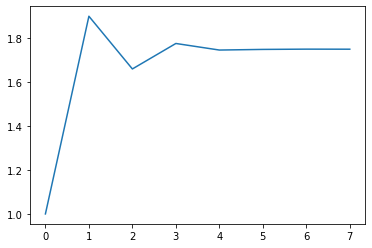

In [24]:
plt.plot(averages);

It does seem we are "converging" to something! 

Indeed - we are converging to the **entropy**! 

# Entropy 

<div class="info">

<font size="7">📜</font>**Definition**: The **entropy** of a random variable $X$ with distribution $p$ is given by:
    
$$
\begin{align}
H(X) = H(p) &= \sum_x p(x)\log \frac{1}{p(x)} \\
            &= \color{red}{-} \sum_x p(x)\log p(x)
\end{align}
$$
    
</div>

We just gave its technical definition. In the section above, we also introduced entropy through one if its many **operational definitions**. Here are a few more:

<div class="info">

<font size="7">🙇🏽‍♂️</font>The **entropy** of a random variable $X$ (or a distribution $p$), can be thought of as:

* the **compression limit/compressibility** of that random variable!
* the **average** amount of **surprise** we feel at observing an outcome!
    
</div>

Lets pause here to discuss these! 

To help us out, lets break down the entropy formula. Can you see the average? What is it an average of? 

Lets define another term that might help:
<div class="info">

<font size="7">📜</font>**Definition**: The **information content** of **an observation** is given by:
    
$$
\text{info}(x) = -\log p(x) = \log \frac{1}{p(x)}
$$

</div>

What does this look like as a function of $p(x)$?

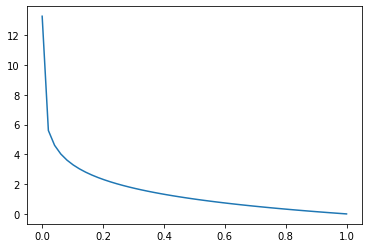

In [25]:
plt.plot(np.linspace(1e-4,1),-np.log2(np.linspace(1e-4,1)));

What do you observe? Lets discuss!

Why is this called the "surprise"? 

Now, we can rewrite the entropy directly as:

$$
H(X) = \sum_x p(x) \; \text{info}(x)
$$

And it clearly becomes the average "information content"!

---

With this working definition in hand, lets try and measure the entropy of simple examples.

## Coins
Lets start with a really unfair coin. It will almost always come up heads:

In [26]:
p_x = [0.99,0.01] # H,T

What is the information associated with a heads?

In [27]:
-np.log2(0.99)

0.014499569695115089

What about a tails?    

In [28]:
-np.log2(0.01)

6.643856189774724

Whoa! We are much more surprised when we see a tails than when we see a heads! 

Does this make sense?

Ok, but **how surprised are we on average?**

In other words, bringing back our operational definitions:

* how much can we "compress" this unfair coin? 
* how surprised are we at observing an average coin flip from this distribution?

Hm. Lets calculate it, and see if it matches our intuitions:

In [29]:
0.01*np.log2(1/0.01) + 0.99*np.log2(1/0.99)

0.08079313589591126

Hm. That doesn't seem like very much - does that match our intuitions above? 

What about a fair coin? How much information, in bits, do you expect a fair coin to have?

Lets calculate! 

In [30]:
p_x = [0.5, 0.5]

In [31]:
0.5*np.log2(1/0.5) + 0.5*np.log2(1/0.5)

1.0

Does this match our intuition?

Lets plot this function, as a function of the probability of heads:

In [32]:
def entropy_coin_flip(prob_heads):
    q = 1-p
    H = p*np.log2(1/p) + q*np.log2(1/q)
    return H

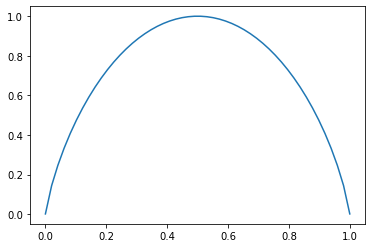

In [33]:
p = np.linspace(1e-4,1-1e-4)
plt.plot(p,entropy_coin_flip(p));

What do you observe here?

# Cross-Entropy 

Ok! Lets continue our discussion. In the example above, Bob and Alice used the same $p_x$ to speak to each other, so they could design a code that was super efficient! 

Now imagine, that Bob and Alice actually have different distributions of words they want to use:

![](figures/info-cross-entropy-dist.png)

In [34]:
bob_p_x = [0.5, 0.25, 0.125, 0.125]

In [35]:
alice_q_x = [0.125, 0.5, 0.25, 0.125]

So we see, Bob will use Dog much more frequently, and Alice will use Cat much more frequently. 

<div class="info">

<font size="7">🤷🏽‍♂️</font>**Pause-and-ponder**: What do you expect the entropy of $q_x$ is? How will it compare to $p_x$? 
    
</div>

Having answered that, now the question becomes: 
* What happens if we design a code using $p_x$, but communicate using $q_x$? How "inefficient" will we be?
* What about the other way around?

Before we give theoretical statements/formulas, lets measure! 

In [36]:
bob_decoding_dict = {'0':'dog','10':'cat','110':'fish','111':'bird'}
bob_encoding_dict = {v: k for k, v in bob_decoding_dict.items()}    # invert dictionary

In [37]:
alice_decoding_dict = {'0':'cat','10':'fish','110':'dog','111':'bird'}
alice_encoding_dict = {v: k for k, v in alice_decoding_dict.items()}    # invert dictionary

Lets first use Bob's encoding for a message taken from Alice's distribution:

In [38]:
num_words = 2000
alice_message = np.random.choice(['dog', 'cat', 'fish', 'bird'],size=num_words,p=alice_q_x)
encoded_message = encode(alice_message,bob_encoding_dict)
average_message_length(encoded_message)

2.226

Aha! We **are** being inefficient! We are spending more bits than we need to! 

Lets measure the other way around:

In [39]:
num_words = 2000
bob_message = np.random.choice(['dog', 'cat', 'fish', 'bird'],size=num_words,p=bob_p_x)
encoded_message = encode(bob_message,alice_encoding_dict)
average_message_length(encoded_message)

2.3905

Aha! They are not the same! And they are both not the "real" entropy! 

What are they?

We have discovered the **cross-entropy**:

<div class="info">

<font size="7">📜</font>**Definition**: The **cross-entropy** between two distributions $p$ and $q$ is given by:
    
$$
\begin{align}
H_p(q) &= \sum_x q(x) \log_2 \frac{1}{p(x)} \\
       &= - \sum_x q(x) \log_2 p(x)
\end{align}
$$

You can think of this as:

<center>How costly is it to use an optimal code for $p$, for messages coming from $q$?</center>

<br/>

---
    
By symmetry, we can also define the other way around:

$$
\begin{align}
H_q(p) &= \sum_x p(x) \log_2 \frac{1}{q(x)} \\
       &= - \sum_x p(x) \log_2 q(x)
\end{align}
$$
     
You can think of this as:

<center>How costly is it to use an optimal code for $q$, for messages coming from $p$?</center>
    
</div>

Aha! We can see immediately why they are not symmetric - one is an expectation with respect to $p$, the other is with respect to $q$! 

Lets calculate: 

$$
H_p(q) = H_{\text{bob}}(\text{alice}) = \text{Using Alice's code for bob's messages}
$$

Plugging in we have:
$$
\begin{align}
H_p(q) &= -\left[ p(dog)\log q(dog) + p(cat)\log q(cat) + p(fish)\log q(fish) + p(bird)\log q(bird) \right]\\
       &= -\left[0.5 \log 0.125 + 0.25 \log 0.5 + 0.125 \log 0.25 + 0.125 \log 0.125
       \right]
\end{align}
$$

In [40]:
H_p_q = -(0.5*np.log2(0.125) + 0.25*np.log2(0.5) + \
          0.125*np.log2(0.25) + 0.125*np.log2(0.125))
H_p_q

2.375

And the other way around we have:

$$
H_q(p) = H_{\text{alice}}(\text{bob}) =  \text{Using Bob's code for Alice's messages}
$$

plugging in we have:

$$
\begin{align}
H_q(p) &= -\left[ q(dog)\log p(dog) + q(cat)\log p(cat) + q(fish)\log p(fish) + q(bird)\log p(bird) \right]\\
       &= -\left[0.125 \log 0.5 + 0.5 \log 0.25 + 0.25 \log 0.125 + 0.125 \log 0.125
       \right]
\end{align}
$$

In [41]:
H_q_p = -(0.125*np.log2(0.5) + 0.5*np.log2(0.25) + \
          0.25*np.log2(0.125) + 0.125*np.log2(0.125))
H_q_p

2.25

So we have:

* Bob using his own code: 1.75 bits
* Alice using her own code: 1.75 bits
* Bob using Alice's code: 2.375
* Alice using Bob's code: 2.25 bits

Wow! 

Why do you think this is non symmetric?

---

# KL Divergence

So far, we have the the cross entropy is our encoding length when we use "the wrong code", and we see that its more than the true entropy. We can define a quantity that tells us "how much more?" 

In other words, a quantity that gives us the extra bits we have used because we used the wrong code. This is called the **Kullback–Leibler (KL) Divergence**:

<div class="info">

<font size="7">📜</font>**Definition**: The **KL-Divergence**: from $p$ to $q$ is given by:
    
$$
D_{KL} (p \| q) = H_q(p) - H(p)
$$

**Note:** This is also **not symmetric**!
    
</div>

Visually: this is represented by:

![](figures/info-kl.png)

We treat the KL divergence, as a **distance between two distributions**. A non-symmetric one!  It measures how different they are! If you take that idea seriously, you end up with **information geometry**!. 

Cross-Entropy and KL divergence are incredibly useful in machine learning. Often, we want one distribution to be close to another. For example, we might want a predicted distribution to be close to the ground truth. KL divergence gives us a natural way to do this, and so it shows up everywhere.

## KL Exercises:

Do the following exercises:
* Calculate the KL divergence between $p$ and $q$
* Calculate the KL divergence between $q$ and $p$
* Hold $p$ constant, and vary the probability of **dog** in $q$, and plot the KL Divergence

---

# Resources

* Elements of Information Theory - Cover & Thomas
* Information Theory, Inference,and Learning Algorithms - David J.C. MacKay